## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
%matplotlib inline

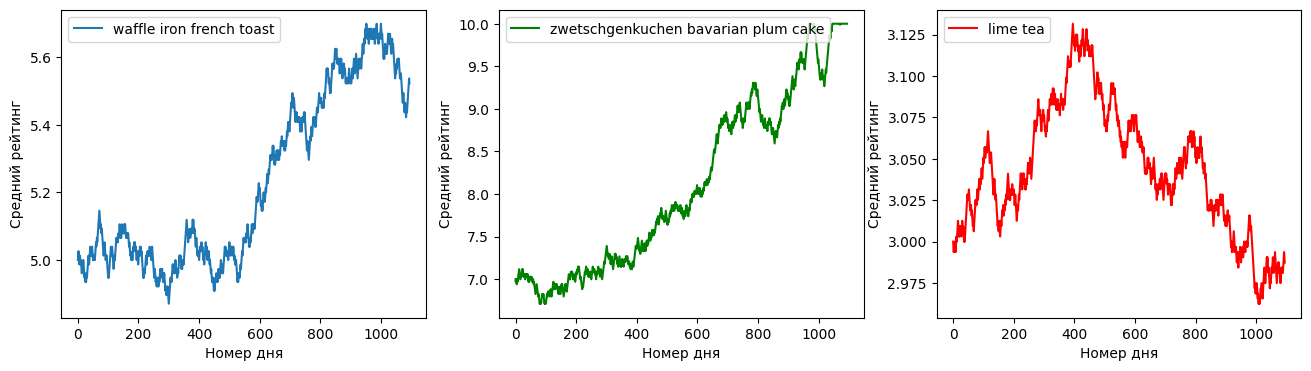

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a = np.load(r'/content/sample_data/average_ratings.npy')
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

rate0 = [r for r in a[0]]
days0 = [d for d in range (len(a[0]))]

rate1 = [r1 for r1 in a[1]]
days1 = [d1 for d1 in range (len(a[1]))]

rate2 = [r for r in a[2]]
days2 = [d for d in range (len(a[2]))]

ax0.plot(days0, rate0, label = 'waffle iron french toast')
ax0.set_xlabel("Номер дня")
ax0.set_ylabel("Средний рейтинг")
ax0.legend(loc='upper left')

ax1.plot(days1, rate1, 'g', label = 'zwetschgenkuchen bavarian plum cake')
ax1.set_xlabel("Номер дня")
ax1.set_ylabel("Средний рейтинг")
ax1.legend(loc='upper left')

ax2.plot(days2, rate2, 'r', label = 'lime tea')
ax2.set_xlabel("Номер дня")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(loc='upper left')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [ ]:
import pandas as pd
data = pd.date_range(start = '1/1/2019', end = '30/12/2021')

<ipython-input-5-6ea225558e86>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.date_range(start = '1/1/2019', end = '30/12/2021')


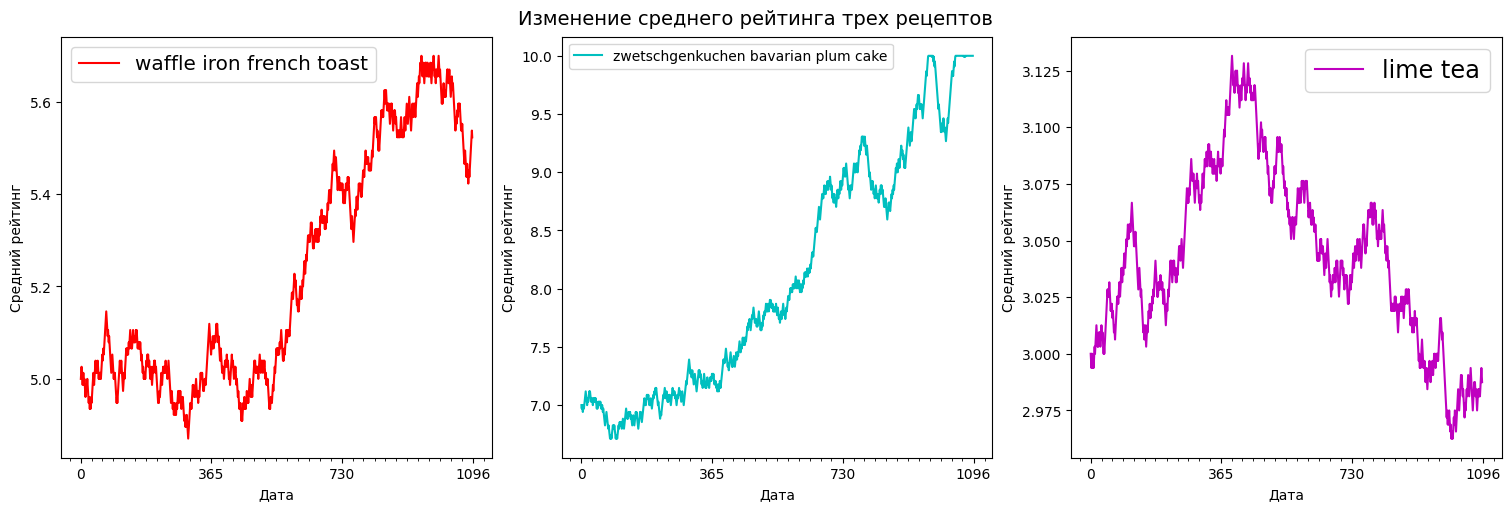

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
a = np.load(r'/content/sample_data/average_ratings.npy')
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5), layout = 'constrained')
fig.suptitle("Изменение среднего рейтинга трех рецептов", fontsize = 14)

rt1 = [r for r in a[0]]
data1 = [d for d in range (len(a[0]))]

rt2 = [r1 for r1 in a[1]]
data2 = [d1 for d1 in range (len(a[1]))]

rt3 = [r for r in a[2]]
data3 = [d for d in range (len(a[2]))]


ax1.plot(data1, rt1, 'r', label = 'waffle iron french toast')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Дата")
ax1.set_ylabel("Средний рейтинг")
ax1.legend(fontsize='x-large')

ax2.plot(data2, rt2, 'c', label = 'zwetschgenkuchen bavarian plum cake')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.set_xlabel("Дата")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(fontsize='medium')

ax3.plot(data3, rt3, 'm', label = 'lime tea')
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.set_xlabel("Дата")
ax3.set_ylabel("Средний рейтинг")
ax3.legend(fontsize='xx-large')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

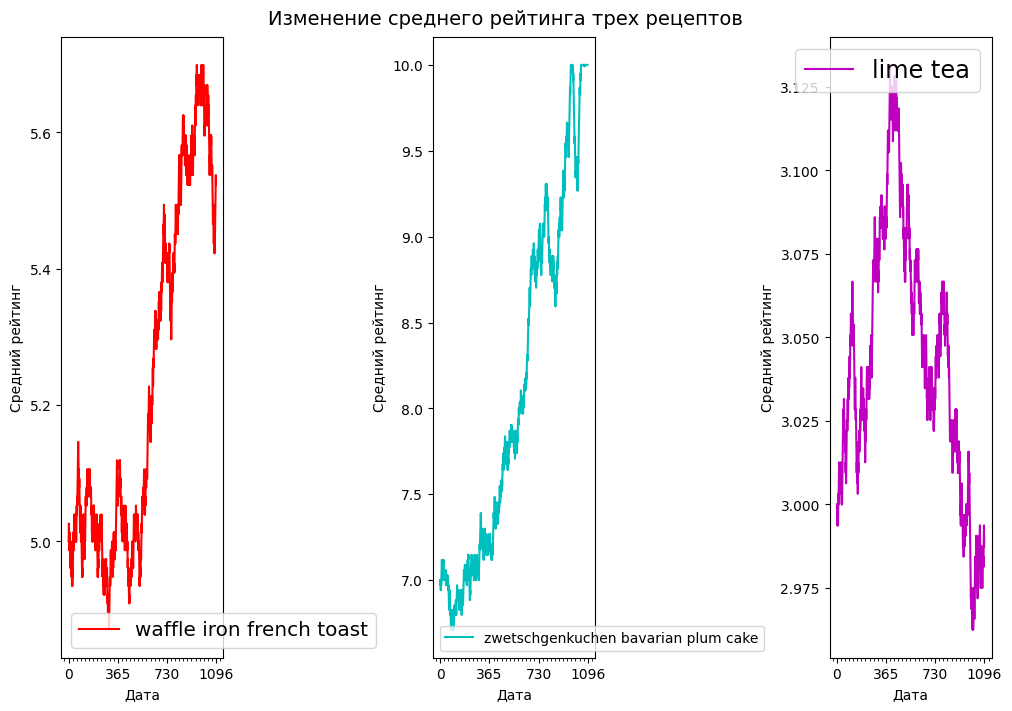

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
a = np.load(r'/content/sample_data/average_ratings.npy')
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10,7), layout = 'constrained')
fig.suptitle("Изменение среднего рейтинга трех рецептов", fontsize = 14)

rt1 = [r for r in a[0]]
data1 = [d for d in range (len(a[0]))]

rt2 = [r1 for r1 in a[1]]
data2 = [d1 for d1 in range (len(a[1]))]

rt3 = [r for r in a[2]]
data3 = [d for d in range (len(a[2]))]

ax1.plot(data1, rt1, 'r', label = 'waffle iron french toast')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Дата")
ax1.set_ylabel("Средний рейтинг")
ax1.legend(fontsize='x-large')

ax2.plot(data2, rt2, 'c', label = 'zwetschgenkuchen bavarian plum cake')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.set_xlabel("Дата")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(fontsize='medium')

ax3.plot(data3, rt3, 'm', label = 'lime tea')
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.set_xlabel("Дата")
ax3.set_ylabel("Средний рейтинг")
ax3.legend(fontsize='xx-large')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0, 0.5, 'Число посетителей')

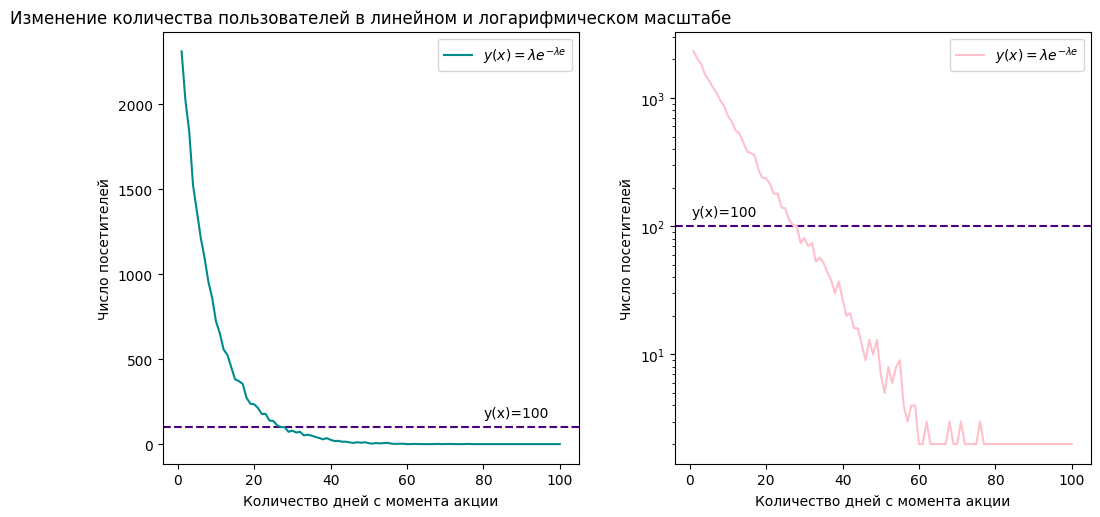

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
file = np.load(r'/content/sample_data/visitors.npy')
days = list(range(1, len(file)+1))
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.65, 0.9])
ax.set_title('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.text(80, 160, 'y(x)=100', rotation=360)
plt.axhline(y=100, color='indigo', ls='--')
ax_log = fig.add_axes([0.9, 0.1, 0.65, 0.9])
plt.axhline(y=100, color='indigo', ls='--', label='y(x)=100')
plt.text(0.4, 120, 'y(x)=100', rotation=360)
line = ax.plot(days, file, 'darkcyan', label = '$y(x) = \lambda e^{-\lambda e}$')
line_log = ax_log.plot(days, file, 'pink', label = '$y(x) = \lambda e^{-\lambda e}$')
ax_log.set_yscale("log")
ax.legend(handles = [line[0]], loc='upper right')
ax_log.legend(handles = [line_log[0]], loc='upper right')
ax.set_xlabel('Количество дней с момента акции')
ax.set_ylabel('Число посетителей')
ax_log.set_xlabel('Количество дней с момента акции')
ax_log.set_ylabel('Число посетителей')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

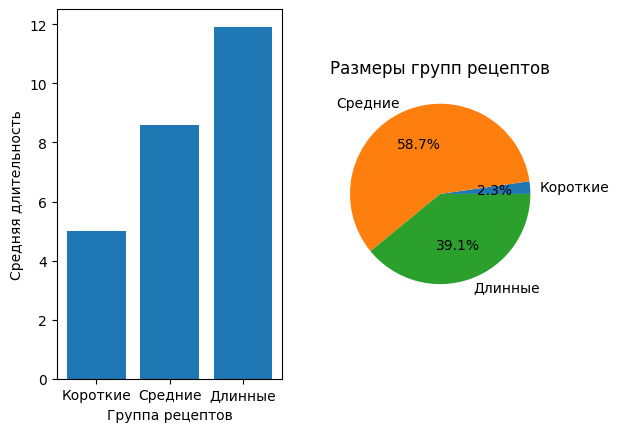

In [3]:
import pandas as pd
recipes = pd.read_csv('/content/sample_data/recipes_sample.csv')
import matplotlib.pyplot as plt

short = recipes[recipes['minutes'] < 5]
medium = recipes[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50)]
long = recipes[recipes['minutes'] >= 50]

short_mean = short['n_steps'].mean()
medium_mean = medium['n_steps'].mean()
long_mean = long['n_steps'].mean()

short_size = len(short)
medium_size = len(medium)
long_size = len(long)

plt.subplot(1, 2, 1)
plt.bar(['Короткие', 'Средние', 'Длинные'], [short_mean, medium_mean, long_mean])
plt.xlabel('Группа рецептов')
plt.ylabel('Средняя длительность')

plt.subplot(1, 2, 2)
labels = ['Короткие', 'Средние', 'Длинные']
sizes = [short_size, medium_size, long_size]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Размеры групп рецептов')

plt.show()                    

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

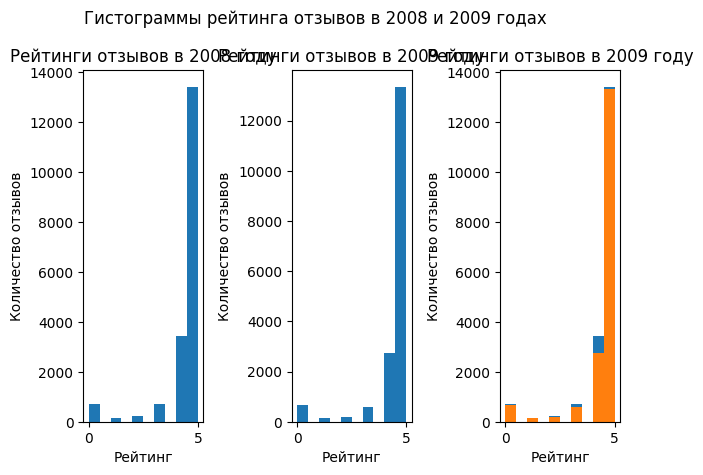

In [5]:
import pandas as pd
reviews = pd.read_csv('/content/sample_data/reviews_sample.csv')
import matplotlib.pyplot as plt

rev08 = reviews[(reviews['date'] >= '2008-01-01') & (reviews['date'] <= '2008-12-31')]
rev09 = reviews[(reviews['date'] >= '2009-01-01') & (reviews['date'] <= '2009-12-31')]

plt.subplot(1, 3, 1)
rev08['rating'].plot.hist()

plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.title('Рейтинги отзывов в 2008 году')

plt.subplot(1, 3, 2)
rev09['rating'].plot.hist()
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.title('Рейтинги отзывов в 2009 году')

plt.subplot(1, 3, 3)
rev08['rating'].plot.hist()
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.title('Рейтинги отзывов в 2008 году')
rev09['rating'].plot.hist()
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.title('Рейтинги отзывов в 2009 году')

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

plt.tight_layout()
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

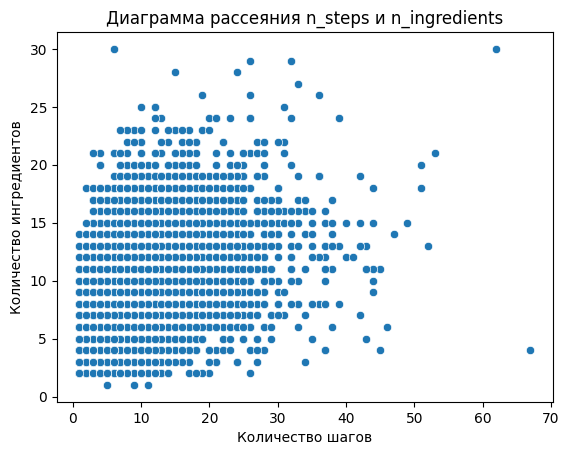

In [4]:
import seaborn as sns
import pandas as pd
recipes = pd.read_csv('/content/sample_data/recipes_sample.csv')
import matplotlib.pyplot as plt
sns.scatterplot(x='n_steps', y='n_ingredients', data=recipes)
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.xlabel('Количество шагов')
plt.ylabel('Количество ингредиентов')
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

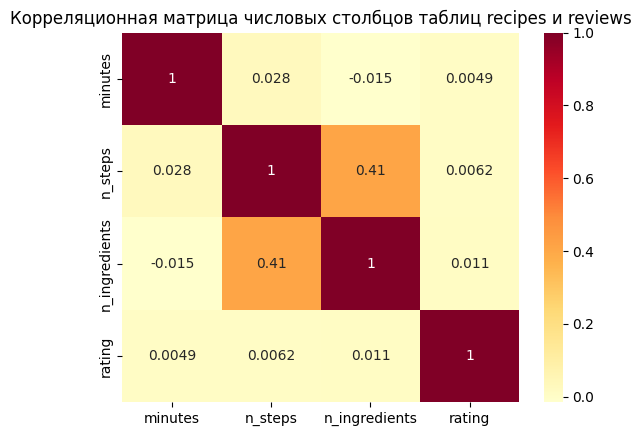

In [6]:
import pandas as pd
recipes = pd.read_csv('/content/sample_data/recipes_sample.csv')
reviews = pd.read_csv('/content/sample_data/reviews_sample.csv')
import matplotlib.pyplot as pltv
merged = pd.merge(recipes, reviews, left_index=True, right_index=True)

merged = merged[['minutes', 'n_steps', 'n_ingredients', 'rating']]

corr_matrix = merged.corr()

corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()